In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
print(os.getcwd())
os.chdir("../")
print(os.getcwd())

/Users/raz/atlarge/papers/multi-meta-model-paper/scripts
/Users/raz/atlarge/papers/multi-meta-model-paper


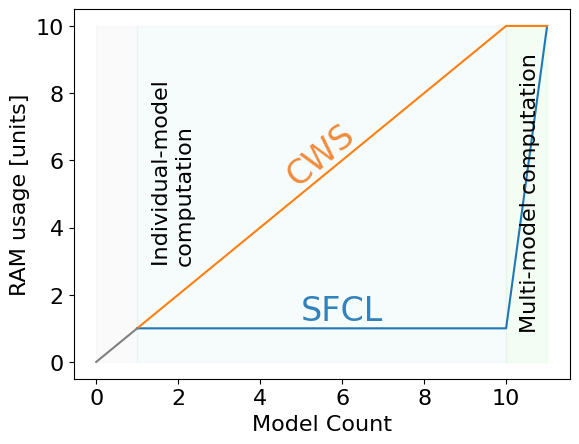

In [3]:
# Create directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

model_IDs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sfcl_demand = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10])
cws_demand = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10])

plt.plot(model_IDs, sfcl_demand)
plt.plot(model_IDs, cws_demand)
plt.plot([0, 1], [0, 1], color="gray")

plt.xlabel(xlabel="Model Count", fontsize=16)
plt.ylabel(ylabel="RAM usage [units]", fontsize=16)
plt.fill_between(x=[0, 1], y1=0, y2=10, color="lightgray", alpha=0.1)
plt.fill_between(x=[1, 10], y1=0, y2=10, color="lightblue", alpha=0.1)
plt.fill_between(x=[10, 11], y1=0, y2=10, color="lightgreen", alpha=0.1)

plt.text(x=1.35, y=3, s="Individual-model \ncomputation", rotation=90, fontsize=16)
plt.text(x=10.35, y=1, s="Multi-model computation", rotation=90, fontsize=16)
plt.text(x=5, y=1.25, s="SFCL", rotation=0, color="#3283BB", fontsize=24)
plt.text(x=4.5, y=5.25, s="CWS", rotation=40, color="#EF8C3C", fontsize=24)

# plt.title(label="RAM usage comparison", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(fname="./plots/ram_usage_comparison.pdf")

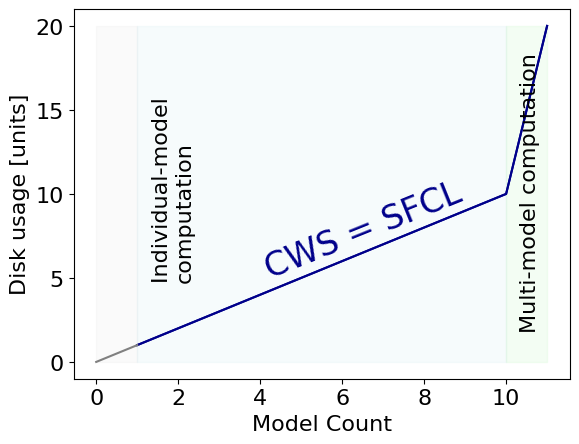

In [4]:
# Create directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

model_IDs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sfcl_demand_disk = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20])
cws_demand_disk = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20])

plt.plot(model_IDs, sfcl_demand_disk, label="SFCL", color="darkblue")
plt.plot(model_IDs, cws_demand_disk, label="CWS", color="darkblue")  # Ensuring the same line is plotted
plt.plot([0, 1], [0, 1], color="gray")

plt.xlabel(xlabel="Model Count", fontsize=16)
plt.ylabel(ylabel="Disk usage [units]", fontsize=16)
plt.fill_between(x=[0, 1], y1=0, y2=20, color="lightgray", alpha=0.1)
plt.fill_between(x=[1, 10], y1=0, y2=20, color="lightblue", alpha=0.1)
plt.fill_between(x=[10, 11], y1=0, y2=20, color="lightgreen", alpha=0.1)

plt.text(x=1.35, y=5, s="Individual-model \ncomputation", rotation=90, fontsize=16)
plt.text(x=10.35, y=2, s="Multi-model computation", rotation=90, fontsize=16)
plt.text(x=4, y=5, s="CWS = SFCL", rotation=22, color="darkblue", fontsize=24)

# plt.title(label="Disk usage comparison", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(ticks=[0, 5, 10, 15, 20], fontsize=16)
plt.savefig(fname="./plots/disk_usage_comparison.pdf")

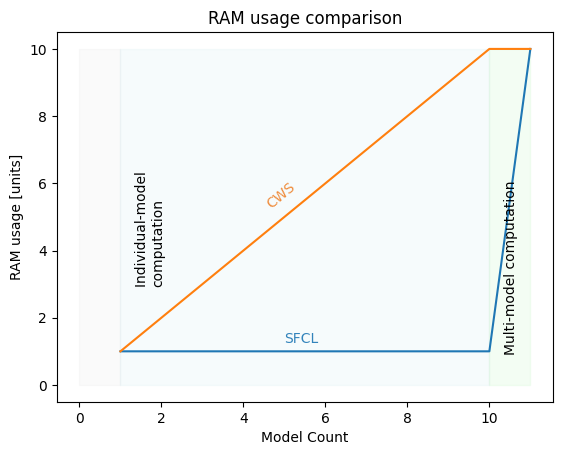

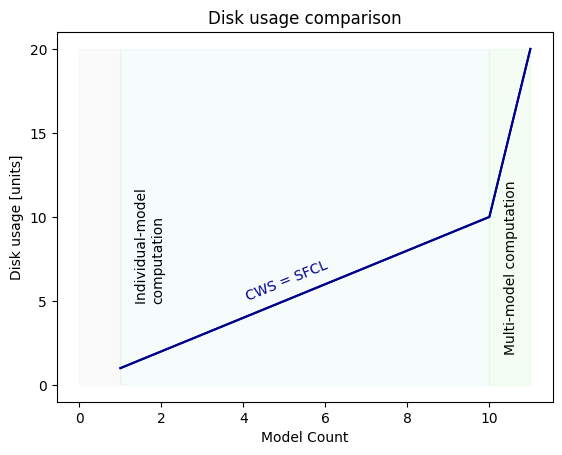

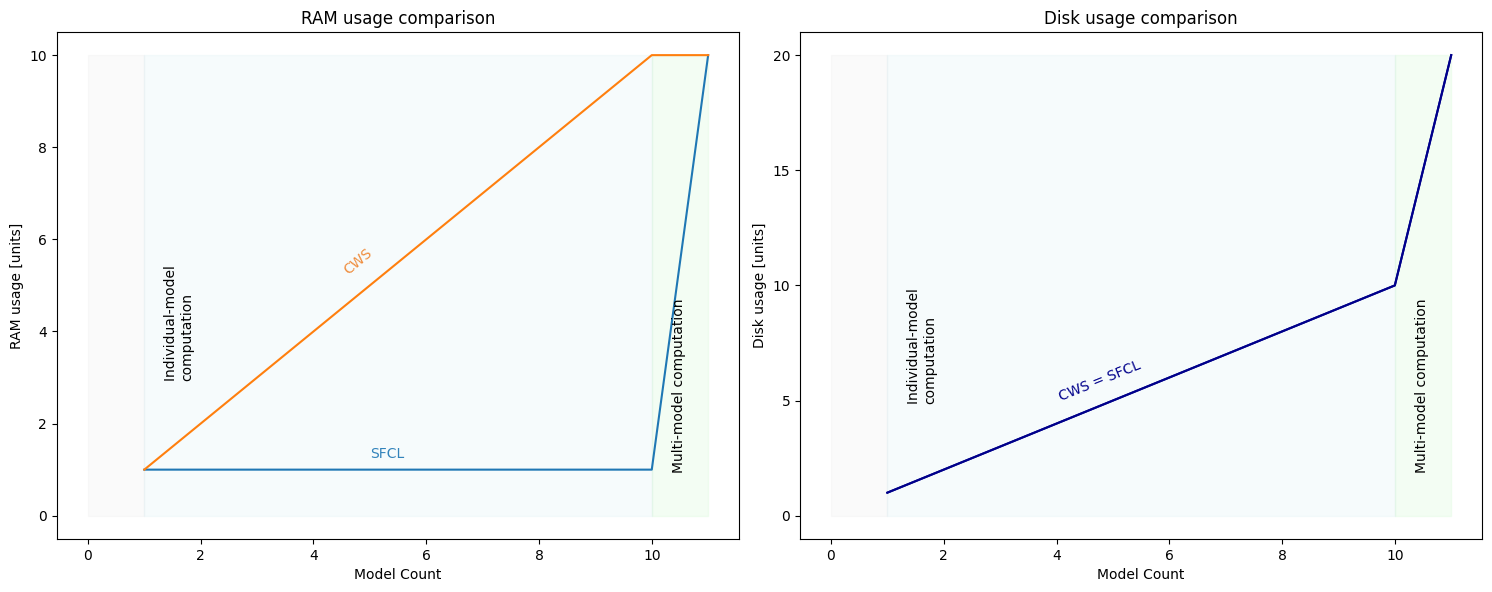

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

# Create directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Data for RAM usage
model_IDs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sfcl_demand = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10])
cws_demand = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10])

# Data for disk usage
sfcl_demand_disk = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20])
cws_demand_disk = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20])

# Create the RAM usage plot
fig, ax1 = plt.subplots()
ax1.plot(model_IDs, sfcl_demand, label="SFCL")
ax1.plot(model_IDs, cws_demand, label="CWS")
ax1.set_xlabel("Model Count")
ax1.set_ylabel("RAM usage [units]")
ax1.fill_between([0, 1], 0, 10, color="lightgray", alpha=0.1, label="Individual models")
ax1.fill_between([1, 10], 0, 10, color="lightblue", alpha=0.1, label="Individual models")
ax1.fill_between([10, 11], 0, 10, color="lightgreen", alpha=0.1, label="Ensemble model")
ax1.text(1.35, 3, "Individual-model \ncomputation", rotation=90)
ax1.text(10.35, 1, "Multi-model computation", rotation=90)
ax1.text(5, 1.25, "SFCL", rotation=0, color="#3283BB")
ax1.text(4.5, 5.25, "CWS", rotation=40, color="#EF8C3C")
ax1.set_title("RAM usage comparison")

# Create the disk usage plot
fig, ax2 = plt.subplots()
ax2.plot(model_IDs, sfcl_demand_disk, label="SFCL", color="darkblue")
ax2.plot(model_IDs, cws_demand_disk, label="CWS", color="darkblue")  # Ensuring the same line is plotted
ax2.set_xlabel("Model Count")
ax2.set_ylabel("Disk usage [units]")
ax2.set_yticks([0, 5, 10, 15, 20])
ax2.fill_between([0, 1], 0, 20, color="lightgray", alpha=0.1, label="Individual models")
ax2.fill_between([1, 10], 0, 20, color="lightblue", alpha=0.1, label="Individual models")
ax2.fill_between([10, 11], 0, 20, color="lightgreen", alpha=0.1, label="Ensemble model")
ax2.text(1.35, 5, "Individual-model \ncomputation", rotation=90)
ax2.text(10.35, 2, "Multi-model computation", rotation=90)
ax2.text(4, 5, "CWS = SFCL", rotation=22, color="darkblue")
ax2.set_title("Disk usage comparison")

# Save both plots in a single PDF file
with PdfPages('plots/comparison_plots_individual.pdf') as pdf:
    pdf.savefig(ax1.figure)
    pdf.savefig(ax2.figure)

# Save both plots side by side in a single PDF file
with PdfPages('plots/comparison_plots_side_by_side.pdf') as pdf:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot RAM usage comparison
    ax1.plot(model_IDs, sfcl_demand, label="SFCL")
    ax1.plot(model_IDs, cws_demand, label="CWS")
    ax1.set_xlabel("Model Count")
    ax1.set_ylabel("RAM usage [units]")
    ax1.fill_between([0, 1], 0, 10, color="lightgray", alpha=0.1, label="Individual models")
    ax1.fill_between([1, 10], 0, 10, color="lightblue", alpha=0.1, label="Individual models")
    ax1.fill_between([10, 11], 0, 10, color="lightgreen", alpha=0.1, label="Ensemble model")
    ax1.text(1.35, 3, "Individual-model \ncomputation", rotation=90)
    ax1.text(10.35, 1, "Multi-model computation", rotation=90)
    ax1.text(5, 1.25, "SFCL", rotation=0, color="#3283BB")
    ax1.text(4.5, 5.25, "CWS", rotation=40, color="#EF8C3C")
    ax1.set_title("RAM usage comparison")

    # Plot disk usage comparison
    ax2.plot(model_IDs, sfcl_demand_disk, label="SFCL", color="darkblue")
    ax2.plot(model_IDs, cws_demand_disk, label="CWS", color="darkblue")  # Ensuring the same line is plotted
    ax2.set_xlabel("Model Count")
    ax2.set_ylabel("Disk usage [units]")
    ax2.set_yticks([0, 5, 10, 15, 20])
    ax2.fill_between([0, 1], 0, 20, color="lightgray", alpha=0.1, label="Individual models")
    ax2.fill_between([1, 10], 0, 20, color="lightblue", alpha=0.1, label="Individual models")
    ax2.fill_between([10, 11], 0, 20, color="lightgreen", alpha=0.1, label="Ensemble model")
    ax2.text(1.35, 5, "Individual-model \ncomputation", rotation=90)
    ax2.text(10.35, 2, "Multi-model computation", rotation=90)
    ax2.text(4, 5, "CWS = SFCL", rotation=22, color="darkblue")
    ax2.set_title("Disk usage comparison")

    plt.tight_layout(pad=1)
    pdf.savefig(fig)
